In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

train_data=data.copy()
warnings.filterwarnings("ignore")

In [51]:
dataset=pd.read_csv(r"C:\Users\progressive\Desktop\Final_Project\DataCoSupplyChainDataset.csv", encoding = 'unicode_escape')

In [52]:
dataset.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [53]:
dataset.shape

(180519, 53)

In [54]:
dataset.apply(lambda x: sum(x.isnull())) #Checking missing values

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [55]:
# Adding first name and last name together to create new column
dataset['Customer Full Name'] = dataset['Customer Fname'].astype(str)+dataset['Customer Lname'].astype(str)

# Late orders
dataset['Is_Late'] = np.where(dataset['Days for shipping (real)'] > dataset['Days for shipment (scheduled)'], 1, 0)
#dataset['No. of Late'] = np.where(dataset['Days for shipping (real)'] > dataset['Days for shipment (scheduled)'], 
#                                  dataset['Days for shipping (real)'] > dataset['Days for shipment (scheduled)'], 0)

dataset['Is_Fraud'] = np.where(dataset['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

# Dropping unnecessary columns and ones with large missing values
data=dataset.drop(columns = ['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname',
                             'Customer Lname','Latitude','Longitude','Product Description','Product Image',
                             'Order Zipcode','shipping date (DateOrders)'])

# 3 NaNs of Custmer Zipcode replaced with 0. 
data['Customer Zipcode'] = data['Customer Zipcode'].fillna(0)

In [56]:
data.shape

(180519, 44)

In [57]:
data.apply(lambda x: sum(x.isnull())) #Checking missing values

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ra

In [58]:
data = data.drop(columns=['Order Profit Per Order', 'Product Category Id', 'Order Customer Id', 
                          'Order Item Cardprod Id', 'Order Item Product Price', 'Sales per customer'])

In [59]:
data.shape

(180519, 38)

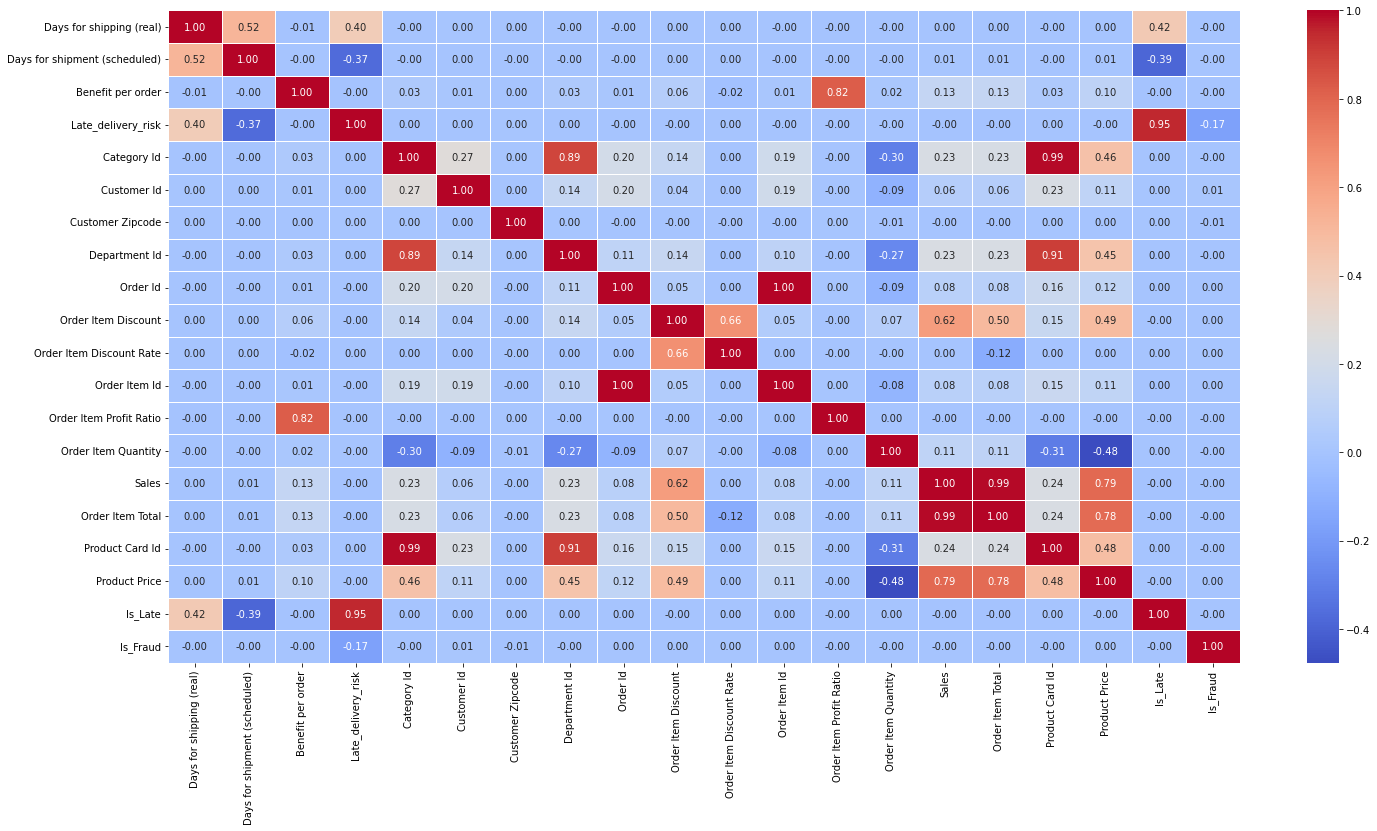

In [60]:
fig, ax = plt.subplots(figsize=(24,12))
c = data.corr()
sns.heatmap(c, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')
plt.show()

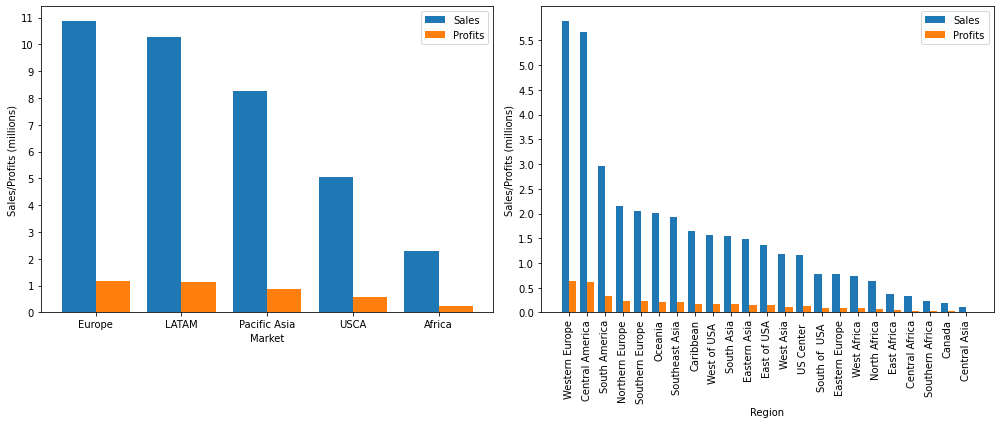

In [61]:
# Data
market = data.groupby('Market')
region = data.groupby('Order Region')
# Sales and Profits by Market plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
markets = market['Sales'].sum().sort_values(ascending=False).index
ticks = np.arange(len(markets))
bar_width = 0.4
ax1.bar(ticks, market['Sales'].sum().reindex(markets), width=bar_width, label='Sales')
ax1.bar(ticks+bar_width, market['Benefit per order'].sum().reindex(markets), width=bar_width, label='Profits')
ax1.set(label='Sale and Profit by Market', xlabel='Market', ylabel='Sales/Profits (millions)', xticks=ticks+bar_width/2, 
        xticklabels=markets, yticks=np.arange(0, 12e6, 1e6), yticklabels=np.arange(0, 12, 1))
ax1.legend()
# Sales and Profits by Region plot
regions = region['Sales'].sum().sort_values(ascending=False).index
ticks = np.arange(len(regions))
bar_width = 0.4
ax2.bar(ticks, region['Sales'].sum().reindex(regions), width=bar_width, label='Sales')
ax2.bar(ticks+bar_width, region['Benefit per order'].sum().reindex(regions), width=bar_width, label='Profits')
ax2.set(label='Sale and Profit by Region', xlabel='Region', ylabel='Sales/Profits (millions)', xticks=ticks+bar_width/2, 
        yticks=np.arange(0, 6e6, 0.5e6), yticklabels=np.arange(0, 6, 0.5))
ax2.set_xticklabels(regions, rotation=90)
ax2.legend()
#region['Sales'].sum().sort_values(ascending=False).plot.bar(title="Total sales for all regions", ax=ax2)
plt.legend()
plt.tight_layout()
plt.show()

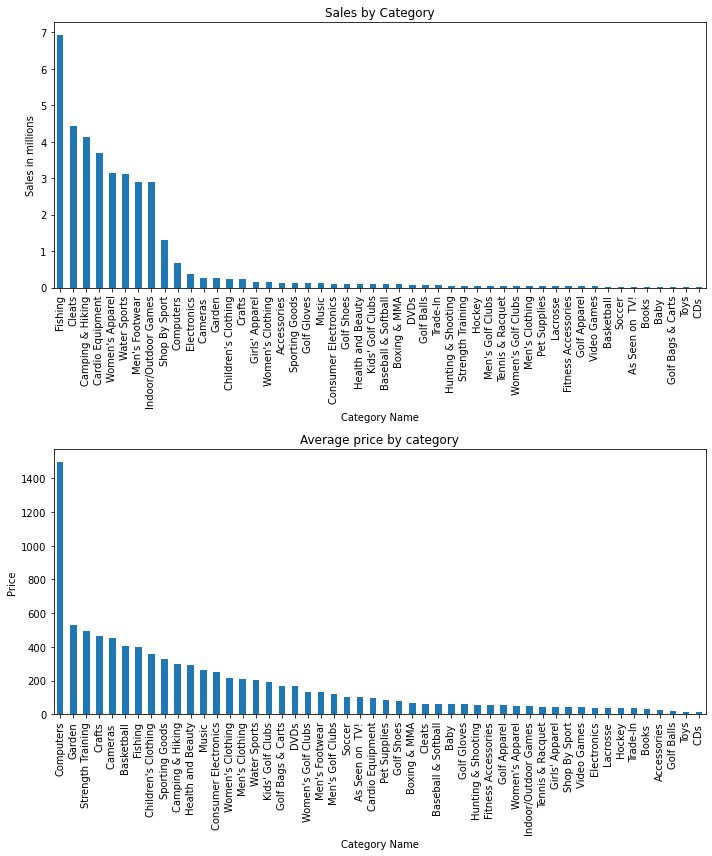

In [24]:
cat = data.groupby('Category Name')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
# Total sum of sales for all categories
cat['Sales'].sum().sort_values(ascending=False).plot.bar(ax=ax1)
ax1.set(title="Sales by Category", ylabel='Sales in millions', yticks=np.arange(0, 8e6, 1e6), yticklabels=np.arange(0, 8, 1))
# Mean prices for all categories
cat['Product Price'].mean().sort_values(ascending=False).plot.bar(ax=ax2)
ax2.set(title="Average price by category", ylabel='Price')
plt.tight_layout()
plt.show()

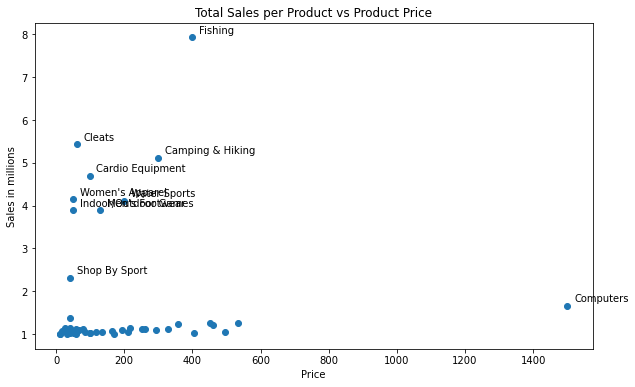

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(cat['Product Price'].mean(), cat['Sales'].sum())
top_10 = list(cat['Sales'].sum().sort_values(ascending=False)[:10].index)
for item in top_10:
    ax.annotate(item, (cat['Product Price'].mean()[item] + 20, cat['Sales'].sum()[item] + 100000))
ax.set(title='Total Sales per Product vs Product Price', ylabel='Sales in millions', xlabel='Price', 
       yticklabels=np.arange(0, 9, 1))
plt.show()

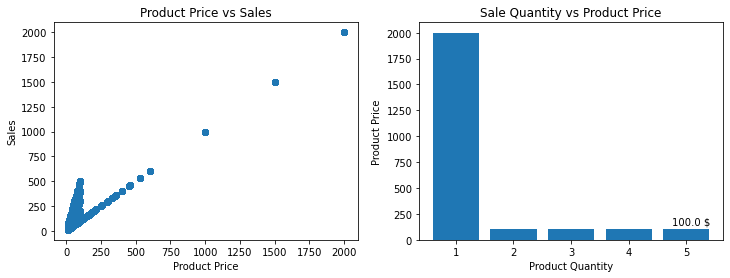

In [26]:
#Quantity bought per product sale.
qty = (data['Sales']/data['Product Price']).round()  
# Maximum Price of the item sold for that quantity
maxP_per_qty = [data[qty==n]['Product Price'].max() for n in qty.unique()]  

fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].scatter(x=data['Product Price'], y=data['Sales'])
ax[0].set(title='Product Price vs Sales', xlabel='Product Price', ylabel='Sales')
ax[1].bar(qty.unique(), maxP_per_qty)
ax[1].set(title='Sale Quantity vs Product Price', xlabel='Product Quantity', ylabel='Product Price')
ax[1].annotate(str(data[qty!=1]['Product Price'].max())+' $', (4.75, data[qty!=1]['Product Price'].max()+50))
plt.show()

In [27]:
date_index = pd.to_datetime(data['order date (DateOrders)'].tolist())
data['order_year']= date_index.year
data['order_month'] = date_index.month
data['order_week_day'] = date_index.weekday
data['order_week'] = date_index.week
data['order_hour'] = date_index.hour
data['order_month_year'] = pd.to_datetime(data['order date (DateOrders)']).dt.to_period('M')

<AxesSubplot:xlabel='order_month_year'>

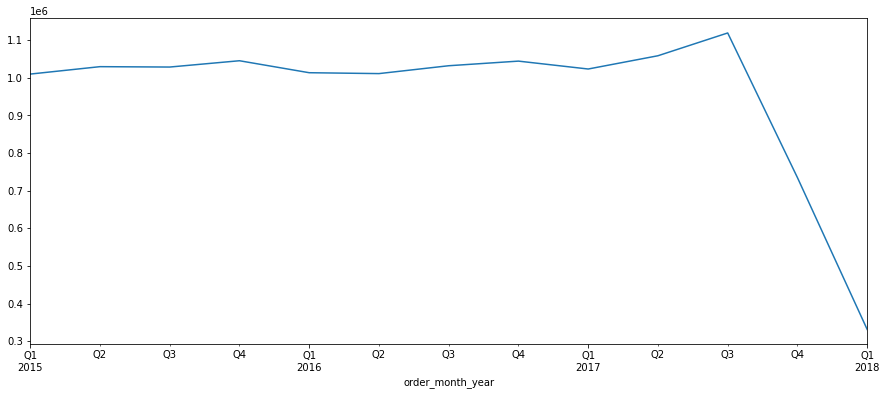

In [28]:
quater= data.groupby('order_month_year')
quater['Sales'].sum().resample('Q').mean().plot(figsize=(15,6))

# Payment Methods:

In [29]:
# Types of payment methods
print(data['Type'].unique())

['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']


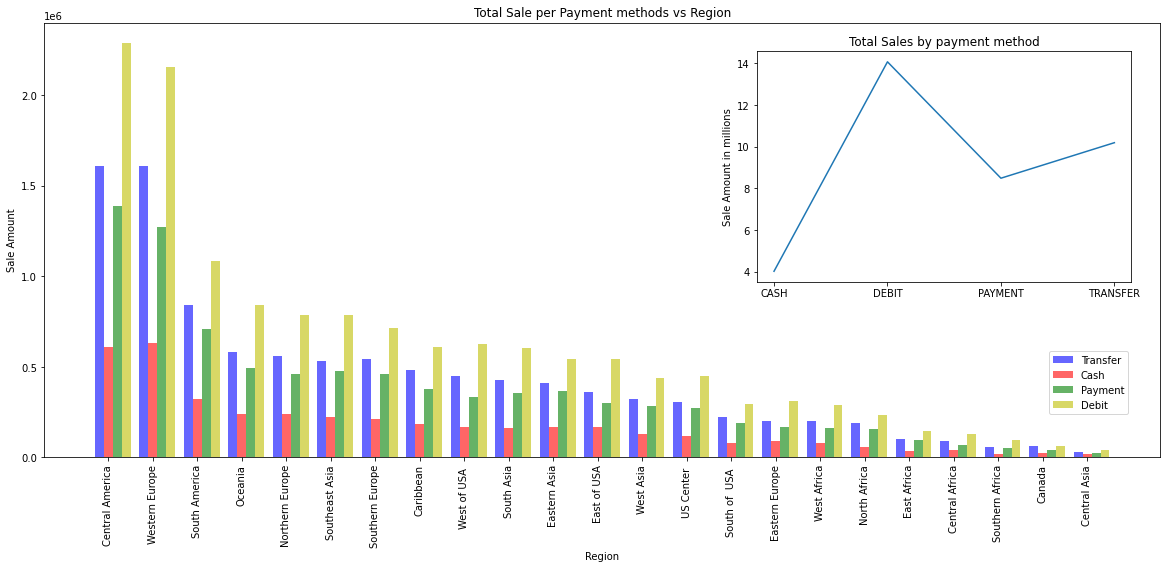

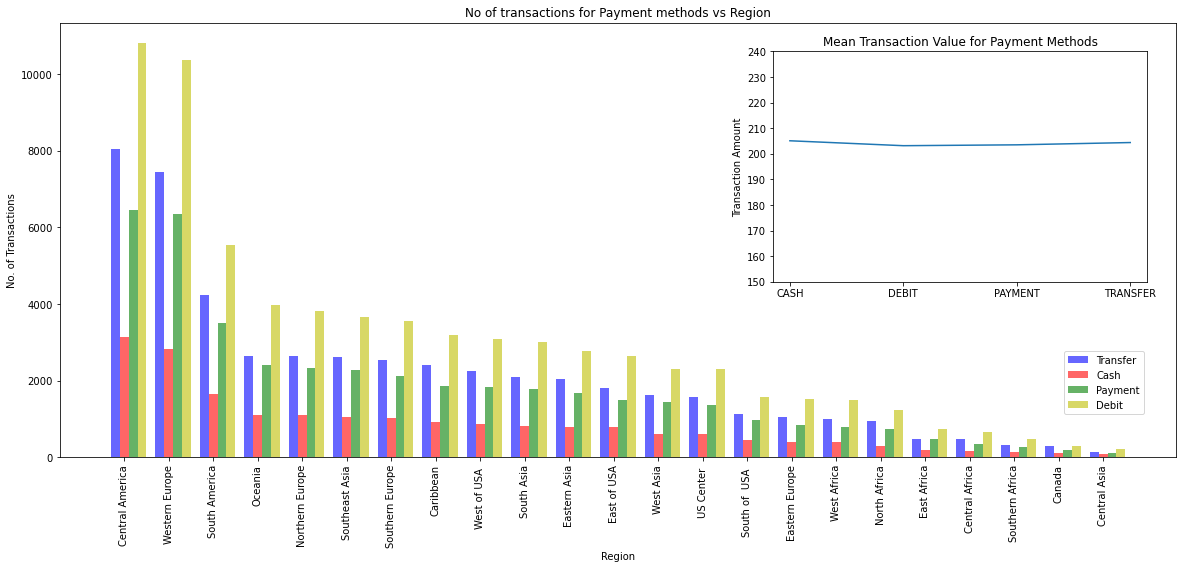

In [30]:
# Plotting number of transactions for each payment method for different regions
# Total Sale by region for each transaction type --
s_transfer = data[(data['Type'] == 'TRANSFER')].groupby('Order Region').sum()['Sales'].reindex(regions)
s_cash = data[(data['Type'] == 'CASH')].groupby('Order Region').sum()['Sales'].reindex(regions)
s_payment = data[(data['Type'] == 'PAYMENT')].groupby('Order Region').sum()['Sales'].reindex(regions)
s_debit = data[(data['Type'] == 'DEBIT')].groupby('Order Region').sum()['Sales'].reindex(regions)

# No. of transactions by region for each transaction type -- 
n_transfer = data[(data['Type'] == 'TRANSFER')]['Order Region'].value_counts()
n_cash = data[(data['Type'] == 'CASH')]['Order Region'].value_counts()
n_payment = data[(data['Type'] == 'PAYMENT')]['Order Region'].value_counts()
n_debit = data[(data['Type'] == 'DEBIT')]['Order Region'].value_counts()

regions = data['Order Region'].value_counts().index
index = np.arange(len(regions))
bar_width=0.2
opacity=0.6

# Plotting total sales by transaction type, by region
fig1,ax1 = plt.subplots(figsize=(20,8))
ax1.bar(index, s_transfer, bar_width, alpha=opacity, color='b', label='Transfer')
ax1.bar(index+bar_width, s_cash, bar_width, alpha=opacity, color='r', label='Cash')
ax1.bar(index+2*bar_width, s_payment, bar_width, alpha=opacity, color='g', label='Payment')
ax1.bar(index+3*bar_width, s_debit, bar_width, alpha=opacity, color='y', label='Debit')
ax1.set(title='Total Sale per Payment methods vs Region', xlabel='Region', ylabel='Sale Amount',
      xticks=index+bar_width)
ax1.set_xticklabels(regions, rotation=90)
# Total Sales by transaction type
ax2 = fig1.add_axes([0.62, 0.43, 0.26, 0.4])
ax2.plot(data.groupby('Type').sum()['Sales'])
ax2.set(title='Total Sales by payment method', ylabel='Sale Amount in millions', yticklabels=np.arange(2, 16, 2))
ax1.legend(loc=(0.9, 0.1))
# Plotting Number of transactions by transaction type by region
fig3,ax3 = plt.subplots(figsize=(20,8))
ax3.bar(index, n_transfer, bar_width, alpha=opacity, color='b', label='Transfer')
ax3.bar(index+bar_width, n_cash, bar_width, alpha=opacity, color='r', label='Cash')
ax3.bar(index+2*bar_width, n_payment, bar_width, alpha=opacity, color='g', label='Payment')
ax3.bar(index+3*bar_width, n_debit, bar_width, alpha=opacity, color='y', label='Debit')
ax3.set(title='No of transactions for Payment methods vs Region', xlabel='Region', ylabel='No. of Transactions',
      xticks=index+bar_width)
ax3.set_xticklabels(regions, rotation=90)
# Mean value of transaction by type
ax4 = fig3.add_axes([0.62, 0.43, 0.26, 0.4])
ax4.plot(data.groupby('Type').mean()['Sales'])
ax4.set(title='Mean Transaction Value for Payment Methods', ylabel='Transaction Amount', 
        yticks=np.arange(150, 250, 10), yticklabels=np.arange(150, 250, 10))
ax3.legend(loc=(0.9, 0.1))


plt.show()

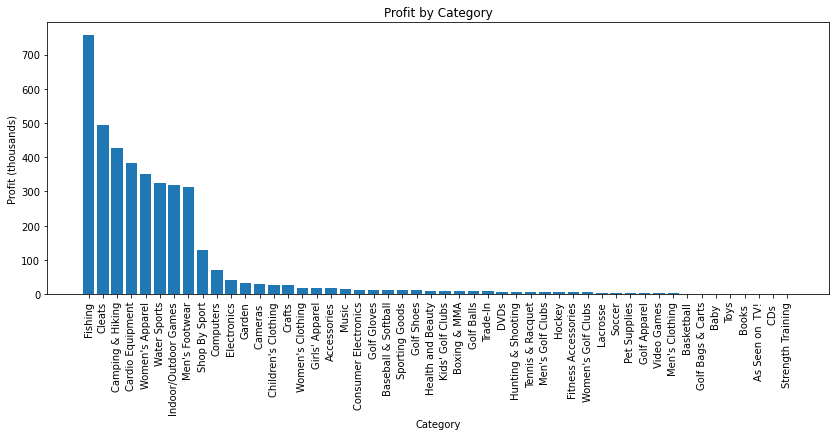

In [31]:
# Profit by Category
profit_cat = data.groupby('Category Name')['Benefit per order'].sum().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(np.arange(len(profit_cat)), profit_cat)
ax.set(title='Profit by Category', xlabel='Category', ylabel='Profit (thousands)', yticklabels=np.arange(0, 800, 100),
      xticks=np.arange(len(profit_cat)))
ax.set_xticklabels(profit_cat.index, rotation=90)
plt.show()

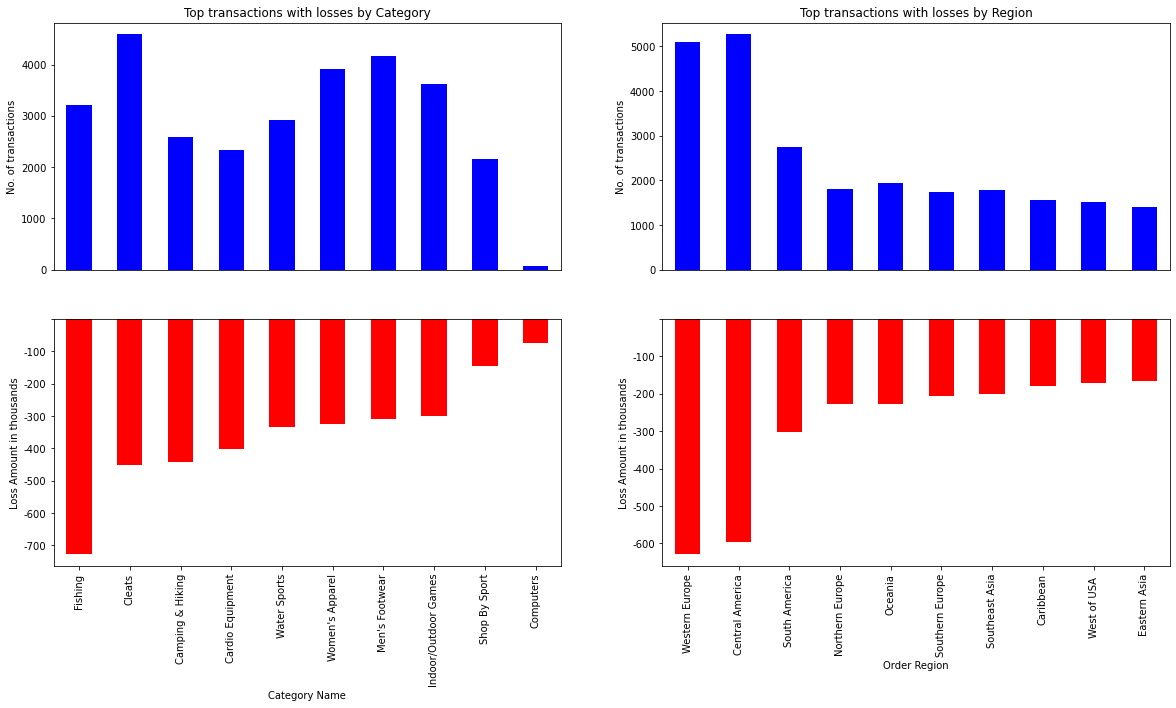

Total losses recorded: -3883547


In [32]:
loss = data[data['Benefit per order']<0]

#Plotting top 10 products with most loss
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.flat
max_loss_cat = loss.groupby('Category Name').sum()['Benefit per order'].nsmallest(10)
loss['Category Name'].value_counts()[max_loss_cat.index].plot.bar(ax=axs[0], color='b')
max_loss_cat.plot.bar(ax=axs[2], color='r')
axs[0].set(title='Top transactions with losses by Category', ylabel='No. of transactions')
axs[0].xaxis.set_visible(False)
axs[2].set(ylabel='Loss Amount in thousands', yticklabels=np.arange(-800, 0, 100))

# Plotting top 10 Regions with max losses
max_loss_reg = loss.groupby('Order Region').sum()['Benefit per order'].nsmallest(10)
loss['Order Region'].value_counts()[max_loss_reg.index].plot.bar(ax=axs[1], color='b')
max_loss_reg.plot.bar(ax=axs[3], color='r')
axs[1].set(title='Top transactions with losses by Region', ylabel='No. of transactions')
axs[1].xaxis.set_visible(False)
axs[3].set(ylabel='Loss Amount in thousands', yticklabels=np.arange(-700, 0, 100))
plt.show()
print('Total losses recorded: %d'%loss['Benefit per order'].sum())

# EDA of fraudulent transactions

In [33]:
data[data['Order Status'] == 'SUSPECTED_FRAUD']['Type'].value_counts()

TRANSFER    4062
Name: Type, dtype: int64

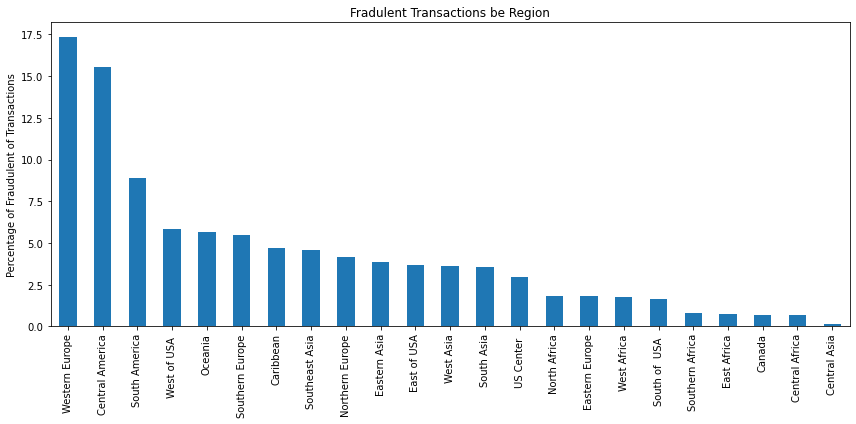

In [34]:
susp_fraud = data[data['Order Status'] == 'SUSPECTED_FRAUD']['Order Region'].value_counts()
susp_fraud_pct = susp_fraud*100/susp_fraud.sum()
# No of fraudulent transactions by region
susp_fraud_pct.plot.bar(figsize=(12, 6))
plt.title('Fradulent Transactions be Region')
plt.ylabel('Percentage of Fraudulent of Transactions')

plt.tight_layout()
plt.show()

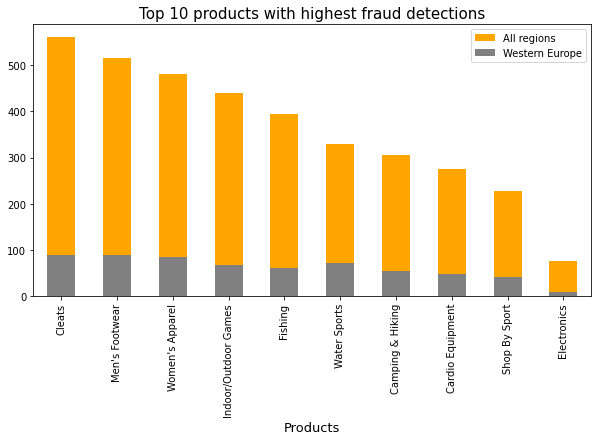

In [36]:
cat_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD')]['Category Name'].value_counts()
WEU_cat_fraud = data[(data['Order Status'] == 'SUSPECTED_FRAUD') &(data['Order Region'] == 'Western Europe')]\
                     ['Category Name'].value_counts().reindex(cat_fraud.index)

# Bar chart for top 10 most suspected fraud department in all regions
cat_fraud[:10].plot.bar(figsize=(10,5), title="Fraud Category",color='orange')
# Bar chart for top 10 most suspected fraud department in Western Europe
WEU_cat_fraud[:10].plot.bar(figsize=(10,5), title="Fraud product in Western Europe",color='grey')

plt.legend(["All regions", "Western Europe"])
plt.title("Top 10 products with highest fraud detections", size=15)
plt.xlabel("Products", size=13)
plt.show()

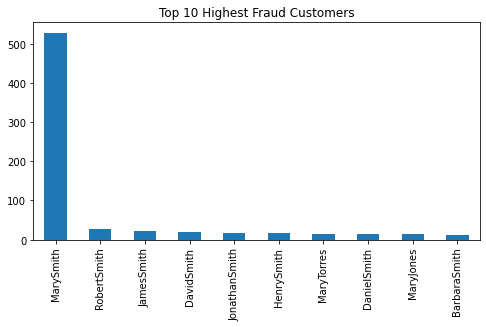

In [37]:
#Top 10 customers with most fraud
cus = data[(data['Order Status'] == 'SUSPECTED_FRAUD')] 
cus['Customer Full Name'].value_counts().nlargest(10).plot.bar(figsize=(8,4), title="Top 10 Highest Fraud Customers")
plt.show()

In [38]:
MarySmith_amt = data[(data['Customer Full Name'] == 'MarySmith')&(data['Order Status'] == 'SUSPECTED_FRAUD')]\
                ['Sales'].sum()
print('Total fraudulent transactions by Mary Smith: %d'%MarySmith_amt)

Total fraudulent transactions by Mary Smith: 102491


In [39]:
print('No of transactions by Mary Smith: ', len(data[data['Customer Full Name']=='MarySmith']))
print('No of Customer Ids registered to Mary Smith :', data[data['Customer Full Name']=='MarySmith']['Customer Id'].count())

No of transactions by Mary Smith:  23884
No of Customer Ids registered to Mary Smith : 23884


# Logistic Efficacy analysis

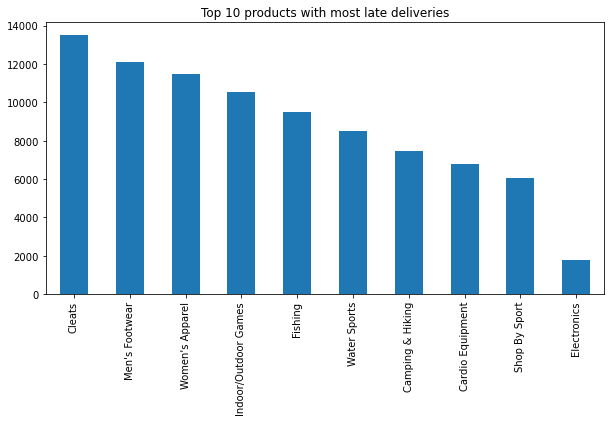

In [40]:
late_delivery = data[(data['Delivery Status'] == 'Late delivery')]
#Top 10 products with most late deliveries
_ = late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(10,5), 
                                                                title="Top 10 products with most late deliveries")

In [41]:
pct = '%'
print('Accuracy of Risk Detection : %.2f'%((data['Late_delivery_risk'] == data['Is_Late']).sum()*100/len(data)), pct)

Accuracy of Risk Detection : 97.55 %


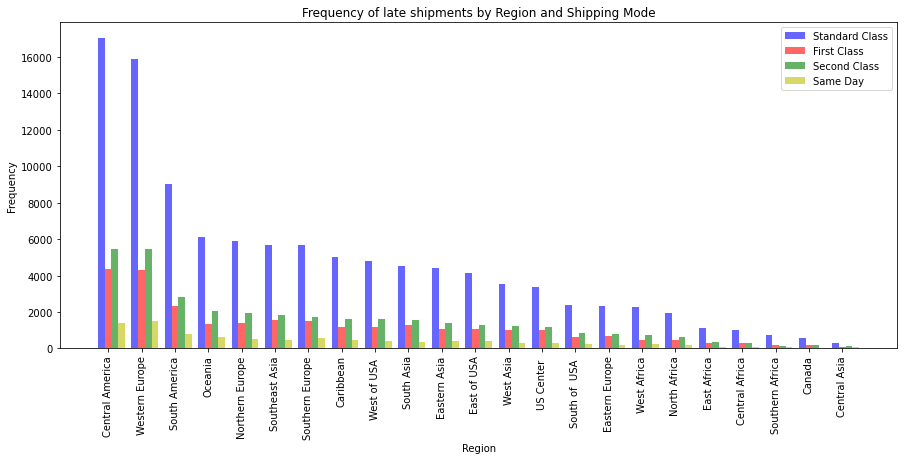

In [64]:
index = data.groupby('Order Region').count()['Sales'].sort_values(ascending=False).index
ticks = np.arange(len(index))

ship_data = data.groupby(['Shipping Mode', 'Order Region']).count()['Sales']
bar_width=0.2
opacity=0.6

# Plotting late deliveries by Shipping mode and region
fig,ax = plt.subplots(figsize=(15,6))
ax.bar(ticks, ship_data['Standard Class'].reindex(index), bar_width, alpha=opacity, color='b', 
       label='Standard Class')
ax.bar(ticks+bar_width, ship_data['First Class'].reindex(index), bar_width, alpha=opacity, color='r', 
       label='First Class')
ax.bar(ticks+2*bar_width, ship_data['Second Class'].reindex(index), bar_width, alpha=opacity, color='g', 
       label='Second Class')
ax.bar(ticks+3*bar_width, ship_data['Same Day'].reindex(index), bar_width, alpha=opacity, color='y', 
       label='Same Day')
ax.set(title='Frequency of late shipments by Region and Shipping Mode', xlabel='Region', ylabel='Frequency',
      xticks=ticks+bar_width)
ax.set_xticklabels(index, rotation=90)
ax.legend()
plt.show()

# Customer segmentation

In [65]:
# Last order:
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['order date (DateOrders)'].sort_values(ascending=False)[0]

Timestamp('2018-01-31 22:56:00')

In [66]:
# To calculate recency, we set our present to 1 day after the last order
present = dt.datetime(2018,2,1)
# Total value per transaction - For monetary analysis
data['TotalPrice'] = data['Order Item Quantity'] * data['Order Item Total']

# Calculating the R, M and F values into a new dataframe
Customer_seg = data.groupby('Customer Id').agg({'order date (DateOrders)': lambda x: (present - x.max()).days, 
                                                'Order Id': 'count', 'TotalPrice': 'sum'})

Customer_seg['order date (DateOrders)'] = Customer_seg['order date (DateOrders)'].astype(int)
# Rename columns as R_Value,F_Value,M_Value
Customer_seg.rename(columns={'order date (DateOrders)': 'R_Value', 
                         'Order Id': 'F_Value', 
                         'TotalPrice': 'M_Value'}, inplace=True)
Customer_seg.head()

,R_Value,F_Value,M_Value
Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032


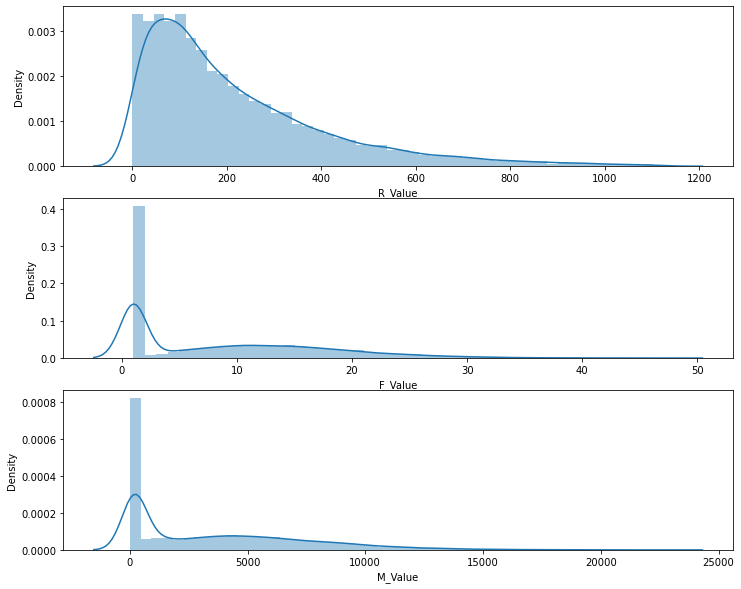

In [67]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
sns.distplot(Customer_seg['R_Value'], ax=ax[0])
sns.distplot(Customer_seg['F_Value'], ax=ax[1])
sns.distplot(Customer_seg['M_Value'], ax=ax[2])
plt.show()

In [68]:
# Quantile binning RFM values into scores from 1 to 4
# Higher scores for larger F and M Values
# Lower scores for higher R values

Customer_seg['R_Score'] = pd.qcut(Customer_seg['R_Value'], q=4, labels=[4, 3, 2, 1])
# F score with 3 bins to preserve quantile arrangement
Customer_seg['F_Score'] = pd.qcut(Customer_seg['F_Value'], q=4, labels=[1, 2, 3], duplicates='drop')
Customer_seg['M_Score'] = pd.qcut(Customer_seg['M_Value'], q=4, labels=[1, 2, 3, 4])

print(Customer_seg['R_Score'].value_counts(), '\n', 
      Customer_seg['F_Score'].value_counts(), '\n',
      Customer_seg['M_Score'].value_counts())

4    5206
1    5159
3    5156
2    5131
Name: R_Score, dtype: int64 
 1    10615
2     5386
3     4651
Name: F_Score, dtype: int64 
 1    5182
3    5163
4    5163
2    5144
Name: M_Score, dtype: int64


In [69]:
# Creating aggregate RFM scores
Customer_seg['RFM_Score'] = Customer_seg.R_Score.astype(str)+ Customer_seg.F_Score.astype(str) + \
                            Customer_seg.M_Score.astype(str)
Customer_seg['RFM_Total'] = Customer_seg[['R_Score','F_Score','M_Score']].sum(axis=1)
Customer_seg.head()

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total
Customer Id,,,,,,,,
1,792,1,2362.250061,1,1,2,112,4
2,136,10,2842.700073,3,2,3,323,8
3,229,18,6143.760057,2,3,4,234,9
4,380,14,4370.629991,1,2,3,123,6
5,457,7,2993.790032,1,1,3,113,5


In [70]:
print(Customer_seg['RFM_Score'].unique())
print(Customer_seg['RFM_Total'].unique())

['112' '323' '234' '123' '113' '124' '334' '223' '111' '333' '134' '214'
 '133' '224' '122' '212' '233' '324' '322' '213' '312' '313' '222' '114'
 '211' '311' '412' '411']
[ 4  8  9  6  5  7 10  3]


In [71]:
Customer_seg['Customer engagement'] = pd.cut(Customer_seg['RFM_Total'], bins=[0, 4, 5, 6, 7, 8, 10], 
                                             labels=['Lost', 'At Risk', 'Needs Attention', 'Promising', 
                                                     'Loyal Customers', 'Champions'])
Customer_seg.head()


,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total,Customer engagement
Customer Id,,,,,,,,,
1,792,1,2362.250061,1,1,2,112,4,Lost
2,136,10,2842.700073,3,2,3,323,8,Loyal Customers
3,229,18,6143.760057,2,3,4,234,9,Champions
4,380,14,4370.629991,1,2,3,123,6,Needs Attention
5,457,7,2993.790032,1,1,3,113,5,At Risk


In [72]:
Customer_seg['Customer engagement'].value_counts()

Needs Attention    8083
Promising          3550
Champions          3261
Loyal Customers    2478
At Risk            2171
Lost               1109
Name: Customer engagement, dtype: int64

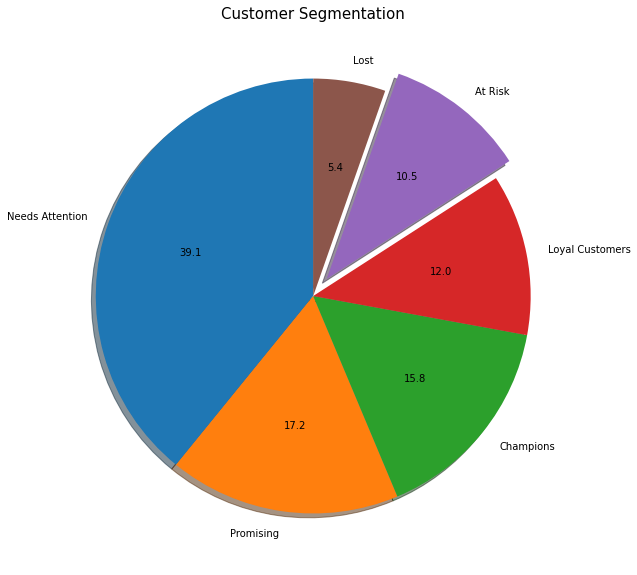

In [73]:
# Calculate average values for each RFM_Level, and return a size of each segment 
Customer_seg['Customer engagement'].value_counts().plot.pie(figsize=(10,10),
                                        startangle=90, explode=(0,0,0,0,0.1,0),autopct='%.1f', shadow=True)
plt.title("Customer Segmentation",size=15)
plt.ylabel(" ")
plt.show()

In [74]:
churned=Customer_seg[(Customer_seg['R_Score']==1)].sort_values(by='M_Score', ascending=False)[:10]
names = data[data['Customer Id'].isin(churned.index)][['Customer Full Name', 'Customer Id']].drop_duplicates()
churned['Name'] = names.set_index('Customer Id').reindex(churned.index)
churned

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total,Customer engagement,Name
Customer Id,,,,,,,,,,
12427,450,19,9884.340099,1,3,4,134,8,Loyal Customers,MarySmith
8999,408,22,7669.710029,1,3,4,134,8,Loyal Customers,PaulSmith
3692,351,17,6844.550079,1,3,4,134,8,Loyal Customers,JamesSmith
8953,463,16,6548.320008,1,3,4,134,8,Loyal Customers,EmmaAvila
3682,308,16,6483.410061,1,3,4,134,8,Loyal Customers,EmilyRomero
3680,563,20,8464.689995,1,3,4,134,8,Loyal Customers,DavidSmith
3678,338,26,9289.450132,1,3,4,134,8,Loyal Customers,AliceCastro
3675,528,18,9379.310013,1,3,4,134,8,Loyal Customers,JoycePittman
3671,318,16,7637.550013,1,3,4,134,8,Loyal Customers,MaryJohnson


In [75]:
#The R_Score should be low and F_Score, M_Score should be as high as possible
new_best=Customer_seg[(Customer_seg['R_Score']==4)].sort_values(by='M_Score', ascending=False)[:10]
names = data[data['Customer Id'].isin(new_best.index)][['Customer Full Name', 'Customer Id']].drop_duplicates()
new_best['Name'] = names.set_index('Customer Id').reindex(new_best.index)
new_best

,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Score,RFM_Total,Customer engagement,Name
Customer Id,,,,,,,,,,
15552,75,1,505.950012,4,1,2,412,7,Promising,JulieBenton
17960,40,1,353.529999,4,1,2,412,7,Promising,BethanyBright
17962,40,1,267.829987,4,1,2,412,7,Promising,OceanMeadows
17963,40,1,285.679993,4,1,2,412,7,Promising,AlexisPugh
17964,40,1,292.820007,4,1,2,412,7,Promising,ShelleyMcconnell
17965,40,1,296.390015,4,1,2,412,7,Promising,LeslieRatliff
17966,40,1,299.959992,4,1,2,412,7,Promising,QuailByrd
17967,40,1,303.540008,4,1,2,412,7,Promising,ZenaidaCurry
17968,40,1,310.679993,4,1,2,412,7,Promising,WillowCasey


# Data Modelling

In [77]:
# Dropping columns unnecessary columns and post-dispatch columns

train_data.drop(columns=['Delivery Status','Late_delivery_risk','Order Status', 'order_week',
                 'order_month_year','order date (DateOrders)', 'Days for shipping (real)'], inplace=True)

In [78]:
train_data.select_dtypes('object').columns

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Product Name', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')

In [79]:
le = LabelEncoder()
# Columns to encode
to_encode = ['Customer Country', 'Market', 'Type', 'Product Name', 'Customer Segment', 'Customer State', 'Order Region',
            'Order City', 'Category Name', 'Customer City', 'Department Name', 'Order State', 'Shipping Mode', 
            'Order Country', 'Customer Full Name']

for col in to_encode:
    train_data[col] = le.fit_transform(train_data[col])

pd.set_option('display.max_columns', 500)
#display the initial records
train_data.head()

,Type,Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Product Card Id,Product Name,Product Price,Shipping Mode,Customer Full Name,Is_Late,Is_Fraud,order_year,order_month,order_week_day,order_hour,TotalPrice
0,1,4,91.250000,73,40,66,1,20755,0,36,725.0,2,4,3,331,70,77202,13.110000,0.04,180517,0.29,1,327.75,314.640015,15,475,1360,78,327.75,3,1876,0,0,2018,1,2,22,314.640015
1,3,4,-249.089996,73,40,66,1,19492,0,36,725.0,2,4,3,391,69,75939,16.389999,0.05,179254,-0.80,1,327.75,311.359985,13,841,1360,78,327.75,3,5378,1,0,2018,1,5,12,311.359985
2,0,4,-247.779999,73,40,452,0,19491,0,5,95125.0,2,4,3,391,69,75938,18.030001,0.06,179253,-0.80,1,327.75,309.720001,13,841,1360,78,327.75,3,4429,0,0,2018,1,5,12,309.720001
3,1,4,22.860001,73,40,285,0,19490,2,5,90027.0,2,4,3,3226,8,75937,22.940001,0.07,179252,0.08,1,327.75,304.809998,11,835,1360,78,327.75,3,12929,0,0,2018,1,5,11,304.809998
4,2,4,134.210007,73,40,66,1,19489,1,36,725.0,2,4,3,3226,8,75936,29.500000,0.09,179251,0.45,1,327.75,298.250000,11,835,1360,78,327.75,3,10638,0,0,2018,1,5,11,298.250000


In [80]:
# We seperate the predictors from the target
xl = train_data.drop(columns=['Is_Fraud', 'Is_Late'])
yl = train_data['Is_Late']

# We drop Is_Late and Is_Fraud from both the training data sets becuase both are post-dispatch variables

In [81]:
train_data['Is_Late'].sum()/train_data['Is_Late'].shape[0]

0.5727928916069777

In [82]:
sc = StandardScaler()
xl_st = sc.fit_transform(xl)

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
import time